# Vietnam areas population status 2011-2020
Link Data: https://www.kaggle.com/datasets/thuanowa/vietnam-areas-population-status-2011-2020/data


In [59]:
!pip install geopandas

  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/3e/cf/ede993ed7070c5487e6db550aad490178c06eaa48ad26ff5e5263f995fba/geopandas-0.14.1-py3-none-any.whl.metadata
  Obtaining dependency information for fiona>=1.8.21 from https://files.pythonhosted.org/packages/7f/27/b24c1610c7ae5716709321f04d38d7b8b71ed531f80df4f697b9ad99cfc3/fiona-1.9.5-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/51.1 kB ? eta -:--:--
     --------------- ---------------------- 20.5/51.1 kB 330.3 kB/s eta 0:00:01
     ------------------------------ ------- 41.0/51.1 kB 495.5 kB/s eta 0:00:01
     -------------------------------------- 51.1/51.1 kB 524.0 kB/s eta 0:00:00
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/79/95/eb68113c5b5737c342bde1bab92705dabe69c16299c5a122616e50f1fbd6/pyproj-3.6.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for shapely>=1.8.0 from 

In [60]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import geopandas as gpd

In [30]:

citi = pd.read_csv("./Data/THOR_Vietnam_Bombing_Operations.csv")
citi.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1572\568458594.py:2: DtypeWarning: Columns (3,13,18,19,20,22,26,27,29,30,32,35,44) have mixed types. Specify dtype option on import or set low_memory=False.
  citi = pd.read_csv("./Data/THOR_Vietnam_Bombing_Operations.csv")


,THOR_DATA_VIET_ID,COUNTRYFLYINGMISSION,MILSERVICE,MSNDATE,SOURCEID,SOURCERECORD,VALID_AIRCRAFT_ROOT,TAKEOFFLOCATION,TGTLATDD_DDD_WGS84,TGTLONDDD_DDD_WGS84,...,GEOZONE,ID,MFUNC_DESC_CLASS,NUMWEAPONSJETTISONED,NUMWEAPONSRETURNED,RELEASEALTITUDE,RELEASEFLTSPEED,RESULTSBDA,TIMEOFFTARGET,WEAPONSLOADEDWEIGHT
0,351,UNITED STATES OF AMERICA,USAF,1971-06-05,647464,SEADAB,EC-47,TAN SON NHUT,NaN,NaN,...,NaN,27135863,NONKINETIC,-1,-1,NaN,NaN,NaN,1005.0,0
1,2,UNITED STATES OF AMERICA,USAF,1972-12-26,642778,SEADAB,EC-47,NAKHON PHANOM,NaN,NaN,...,NaN,27131177,NONKINETIC,-1,-1,NaN,NaN,NaN,530.0,0
2,3,UNITED STATES OF AMERICA,USAF,1973-07-28,642779,SEADAB,RF-4,UDORN AB,NaN,NaN,...,NaN,27131178,NONKINETIC,-1,-1,NaN,NaN,NaN,730.0,0
3,4,UNITED STATES OF AMERICA,USAF,1970-02-02,642780,SEADAB,A-1,NAKHON PHANOM,16.902500,106.014166,...,XE,27131179,KINETIC,-1,-1,NaN,NaN,SECONDARY FIRE,1415.0,17400
4,5,VIETNAM (SOUTH),VNAF,1970-10-08,642781,SEADAB,A-37,DANANG,14.945555,108.257222,...,ZB,27131180,KINETIC,-1,-1,NaN,NaN,RNO WEATHER,1240.0,0


In [31]:
cities = pd.read_csv("./Data/V02.01.csv", encoding='latin')
cities.head()

,Tinh,Dien tich(Km2),Dan so trung binh (Nghin nguoi),Mat do dân so (Nguoi/km2)
0,Ha Noi,3359.84,8435.65,2511.0
1,Vinh Phuc,1236.00,1197.62,969.0
2,Bac Ninh,822.71,1488.20,1809.0
3,Quang Ninh,6207.93,1362.88,220.0
4,Hai Duong,1668.28,1946.82,1167.0


In [51]:
mission_lat_lon = citi[['COUNTRYFLYINGMISSION', 'TGTLATDD_DDD_WGS84', 'TGTLONDDD_DDD_WGS84']]
mission_lat_lon = mission_lat_lon.rename(columns={"COUNTRYFLYINGMISSION": "country", 
                                       "TGTLATDD_DDD_WGS84": "latitude", "TGTLONDDD_DDD_WGS84" : "longitude"})
mission_lat_lon = mission_lat_lon[pd.notnull(mission_lat_lon['latitude'])]
mission_lat_lon = mission_lat_lon[pd.notnull(mission_lat_lon['longitude'])]
mission_lat_lon = mission_lat_lon[pd.notnull(mission_lat_lon['country'])]
print(mission_lat_lon.head())

                     country   latitude   longitude
3   UNITED STATES OF AMERICA  16.902500  106.014166
4            VIETNAM (SOUTH)  14.945555  108.257222
5   UNITED STATES OF AMERICA  19.602222  103.597222
6   UNITED STATES OF AMERICA  14.573611  106.689722
15  UNITED STATES OF AMERICA  17.563611  105.756666


In [52]:
mission_lat_lon['latitude'] = mission_lat_lon['latitude'].round(2)
mission_lat_lon['longitude'] = mission_lat_lon['longitude'].round(2)
print("BEFORE DROP DUPLICATES : ",mission_lat_lon.shape)
mission_lat_lon = mission_lat_lon.drop_duplicates()
print("AFTER DROP DUPLICATES : ",mission_lat_lon.shape)

BEFORE DROP DUPLICATES :  (3540263, 3)
AFTER DROP DUPLICATES :  (246561, 3)


In [54]:

lon = mission_lat_lon['longitude'].values
lat = mission_lat_lon['latitude'].values


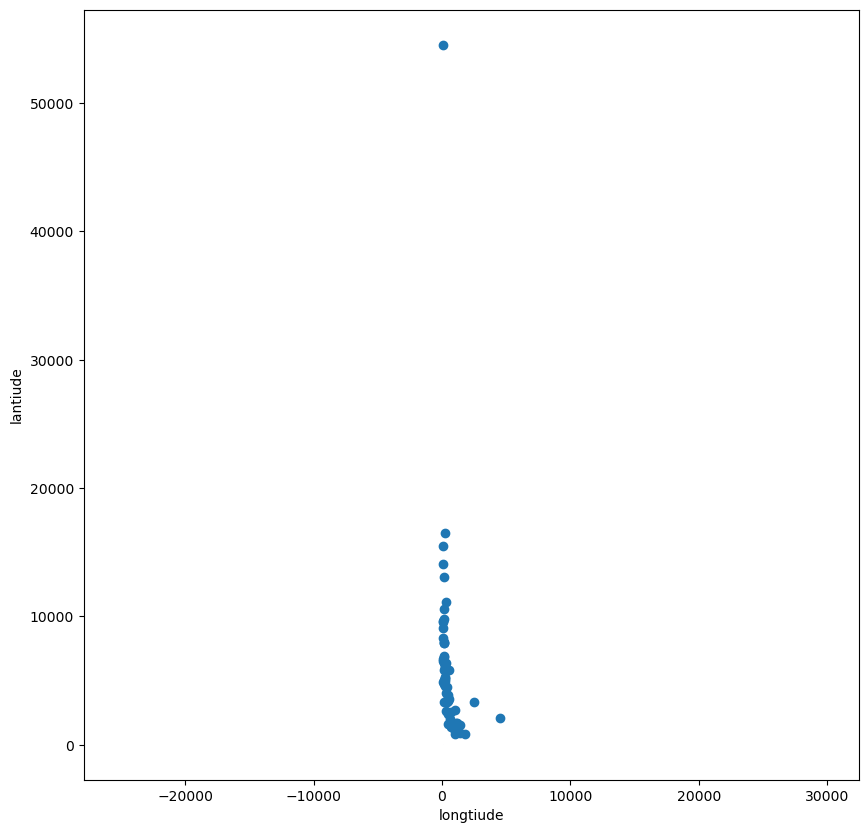

In [71]:
population, area = cities["Mat do dân so (Nguoi/km2)"],cities["Dien tich(Km2)"]

# Load data
fp = "./Data/gadm36_VNM_shp"
map_df = gpd.read_file(fp)

# Plot map
fig, ax = plt.subplots(figsize=(10, 10))
map_df.plot(ax=ax)

plt.scatter(population, area)
plt.axis("equal")
plt.xlabel('longtiude')
plt.ylabel('lantiude');

